<a href="https://colab.research.google.com/github/Italoalberto/Hacker-de-Fiscalizacao-e-Analise-de-Dados/blob/main/Remunera%C3%A7%C3%A3o_Executivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Hacker de Fiscalização e Análise de Dados

Proposta: Fazer uma breve análise sobre a evolução da remuneração de servidores federais.

"Baseado na tabela em CSV com a série histórica 'Remuneração líquida média
mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)',
disponível no site do Atlas do Estado Brasileiro (IPEA), comente uma ou duas
tendências da evolução da remuneração destes servidores de acordo com seu
sexo e/ou raça.". Dados obtidos em: https://www.ipea.gov.br/atlasestado/filtros-series

# Importando dependências

In [1]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos
from sklearn.linear_model import LinearRegression

In [2]:
#liberando acesso do colab aos arquivos no Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Carregando dados

In [3]:
#lendo o csv que contem as base de dados em dfs
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/6957-racasexo.csv', sep=';')

In [41]:
df.head()

,ano,raça,Fem,Mas,total,total_ano,fem_ano,mas_ano
ano,,,,,,,,
1999,1999,AMARELA,7319,8566,15885,477416,210314,267102
1999,1999,BRANCA,105793,124198,229991,477416,210314,267102
1999,1999,INDIGENA,530,1054,1584,477416,210314,267102
1999,1999,NAO INFORMADO,32792,50004,82796,477416,210314,267102
1999,1999,PARDA,54612,74169,128781,477416,210314,267102


# Visualização de tendências




In [43]:
# converter valores em um array de numpy
X = df.iloc[:, 0].values.reshape(-1, 1)
# -1 significa que calculamos a dimensão das linhas mas temos 1 coluna  
Y = df.iloc[:, 5].values.reshape(-1, 1)
# criar um objeto para a classe  
linear_regressor = LinearRegression()
# performar a regressão linear  
linear_regressor.fit(X, Y)
# fazer predições  
Y_pred = linear_regressor.predict(X)  

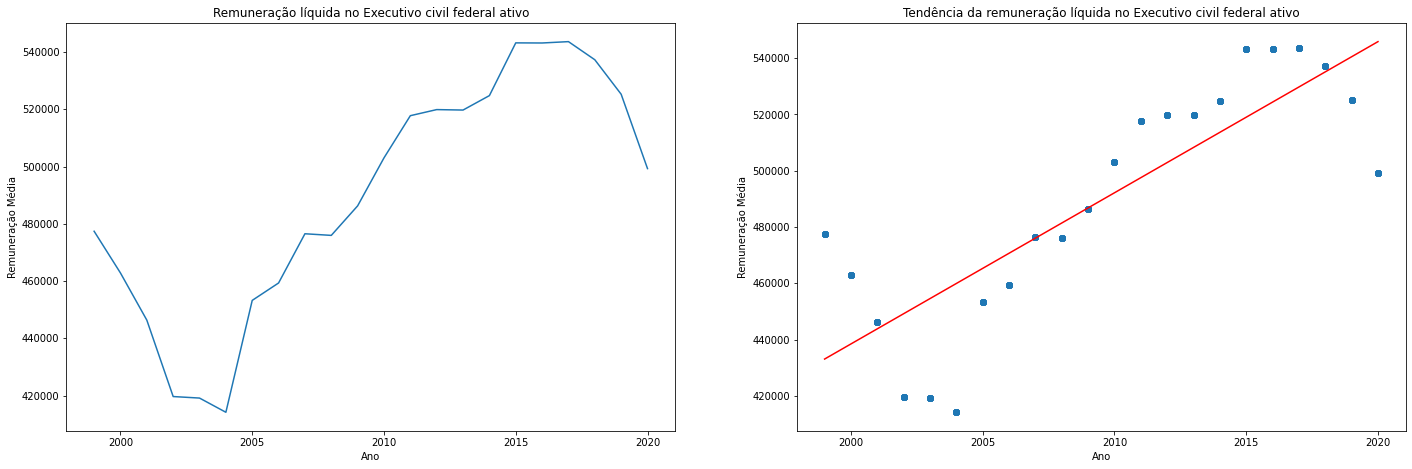

In [44]:
# fazer um depara de variáveis por colunas do dataframe
total_ano = df['total_ano']
ano = df['ano']

# definir o índice da coluna
df.set_index(ano, inplace=True)

# criar subplots para visualizar os dois gráficos um ao lado do outro
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 7.5))

# adicionar título e legendas do x e y

axes[0].set_title('Remuneração líquida no Executivo civil federal ativo')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Remuneração Média')

axes[1].set_title('Tendência da remuneração líquida no Executivo civil federal ativo')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Remuneração Média')

axes[0].plot(ano, total_ano)
axes[1].scatter(X, Y)
axes[1].plot(X, Y_pred, color='red')

O gráfico acima demonstra uma série histórica do valor de remuneração média líquida no Executivo civil federal ativo em relação aos anos de 1999 até 2020.
No primeiro gráfico a esquerda podemos perceber que há uma tendência de crescimento do valor de remuneração pouco antes de 2005, fenômeno esse que podemos reforçar por meio da regressão linear apresentada no segundo gráfico. Nisso, vemos que por volta do ano de 2004, há uma elevação significativa do valor de remuneração até o ano de 2015, o que resulta nessa faixa de tempo em um aumento considerável de recebimento desses servidores. Esse aumento fica estagnado por um tempo, mas logo já começa a decrescer. A abertura da regressão linear indica que mesmo decrescendo a tendência ainda é de crescimento do valor de remuneração nos próximos anos. 

raça
AMARELA          AxesSubplot(0.547727,0.125;0.352273x0.755)
BRANCA           AxesSubplot(0.547727,0.125;0.352273x0.755)
INDIGENA         AxesSubplot(0.547727,0.125;0.352273x0.755)
NAO INFORMADO    AxesSubplot(0.547727,0.125;0.352273x0.755)
PARDA            AxesSubplot(0.547727,0.125;0.352273x0.755)
PRETA            AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: Fem, dtype: object

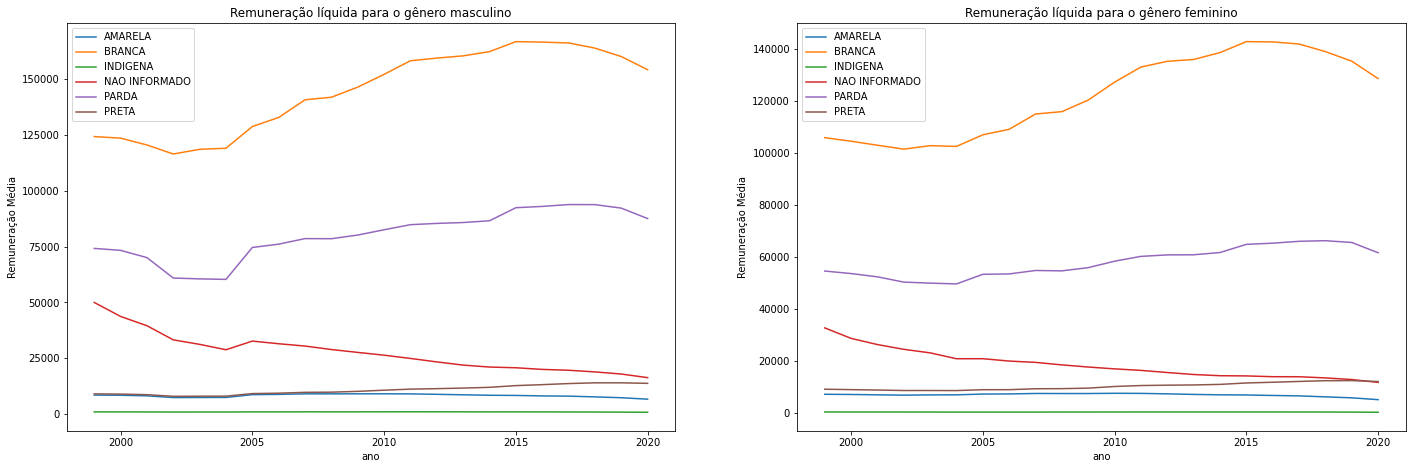

In [49]:
# definir o índice da coluna
df.set_index(ano, inplace=True)

# criar subplots para visualizar os dois gráficos um ao lado do outro
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 7.5))

axs[0].set_title('Remuneração líquida para o gênero masculino')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Remuneração Média')

axs[1].set_title('Remuneração líquida para o gênero feminino')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Remuneração Média')

# agrupar o dado por produto e desenhar um gráfico de linha
df.groupby('raça')['Mas'].plot(legend=True, ax=axs[0])
df.groupby('raça')['Fem'].plot(legend=True, ax=axs[1])

No geral, vemos que os comportamentos de valores médios de remuneração no decorrer dos anos é bastante similar para ambos os gêneros. Porém, podemos constatar que os valores de remuneração para o gênero feminino são menores para todas as raças e em toda sequência de anos em relação ao gênero masculino. Outra constatação importante de se verificar é que a raça branca ganha mais do que as outras em todo esse período de análise para ambos os gêneros. Valores de medições estatísticas apresentadas abaixo reforçam esse fenômeno, indicando que o comportamento de remuneração varia bastante de acordo com o segmento de gênero e raça que cada grupo específico se encaixa.

In [46]:
# verificar medidas estatísticas dos valores em relação a todas as raças no gênero masculino
df.groupby('raça')['Mas'].describe().transpose()

raça,AMARELA,BRANCA,INDIGENA,NAO INFORMADO,PARDA,PRETA
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,8350.954545,144600.500000,1033.863636,27714.909091,80217.863636,10838.954545
std,696.932632,18423.881815,52.068906,8630.355976,10678.856106,2081.986882
min,6740.000000,116405.000000,882.000000,16372.000000,60326.000000,8018.000000
25%,7850.750000,125321.250000,1002.000000,20868.500000,74276.750000,9143.250000
50%,8493.500000,149179.000000,1054.000000,27033.000000,81337.500000,10498.000000
75%,8903.750000,160225.000000,1069.000000,31462.250000,87272.500000,12614.750000
max,9141.000000,166663.000000,1100.000000,50004.000000,93791.000000,14051.000000


In [47]:
# verificar medidas estatísticas dos valores em relação a todas as raças no gênero feminino
df.groupby('raça')['Fem'].describe().transpose()

raça,AMARELA,BRANCA,INDIGENA,NAO INFORMADO,PARDA,PRETA
count,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000
mean,7088.545455,122059.00000,508.772727,18782.818182,57939.772727,10333.136364
std,595.446909,15611.68875,27.102858,5539.171544,5603.467565,1375.153404
min,5258.000000,101395.00000,416.000000,11872.000000,49673.000000,8745.000000
25%,7003.750000,106068.75000,495.750000,14387.500000,53544.500000,9092.250000
50%,7183.500000,123668.50000,514.500000,17424.500000,57155.000000,9994.000000
75%,7479.500000,135649.75000,527.750000,20967.500000,61703.750000,11523.250000
max,7698.000000,142657.00000,539.000000,32792.000000,66264.000000,12571.000000
